In [ ]:
# ml_philip.ipynb
# Machine Learning with the Pima Indians Diabetes Dataset
# Philip Fowler
# 14 March 2025
# This notebook is a simple example of machine learning using the Pima Indian Diabetes dataset.
# The dataset is available from Kaggle

# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")


print("Path to dataset files:", path)

Path to dataset files: /home/philip/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [123]:
# set style
# sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Load and Examine the Data

In [124]:
# Load the Pima Indians Diabetes dataset
df = pd.read_csv(f"{path}/diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [125]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
df.describe()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis

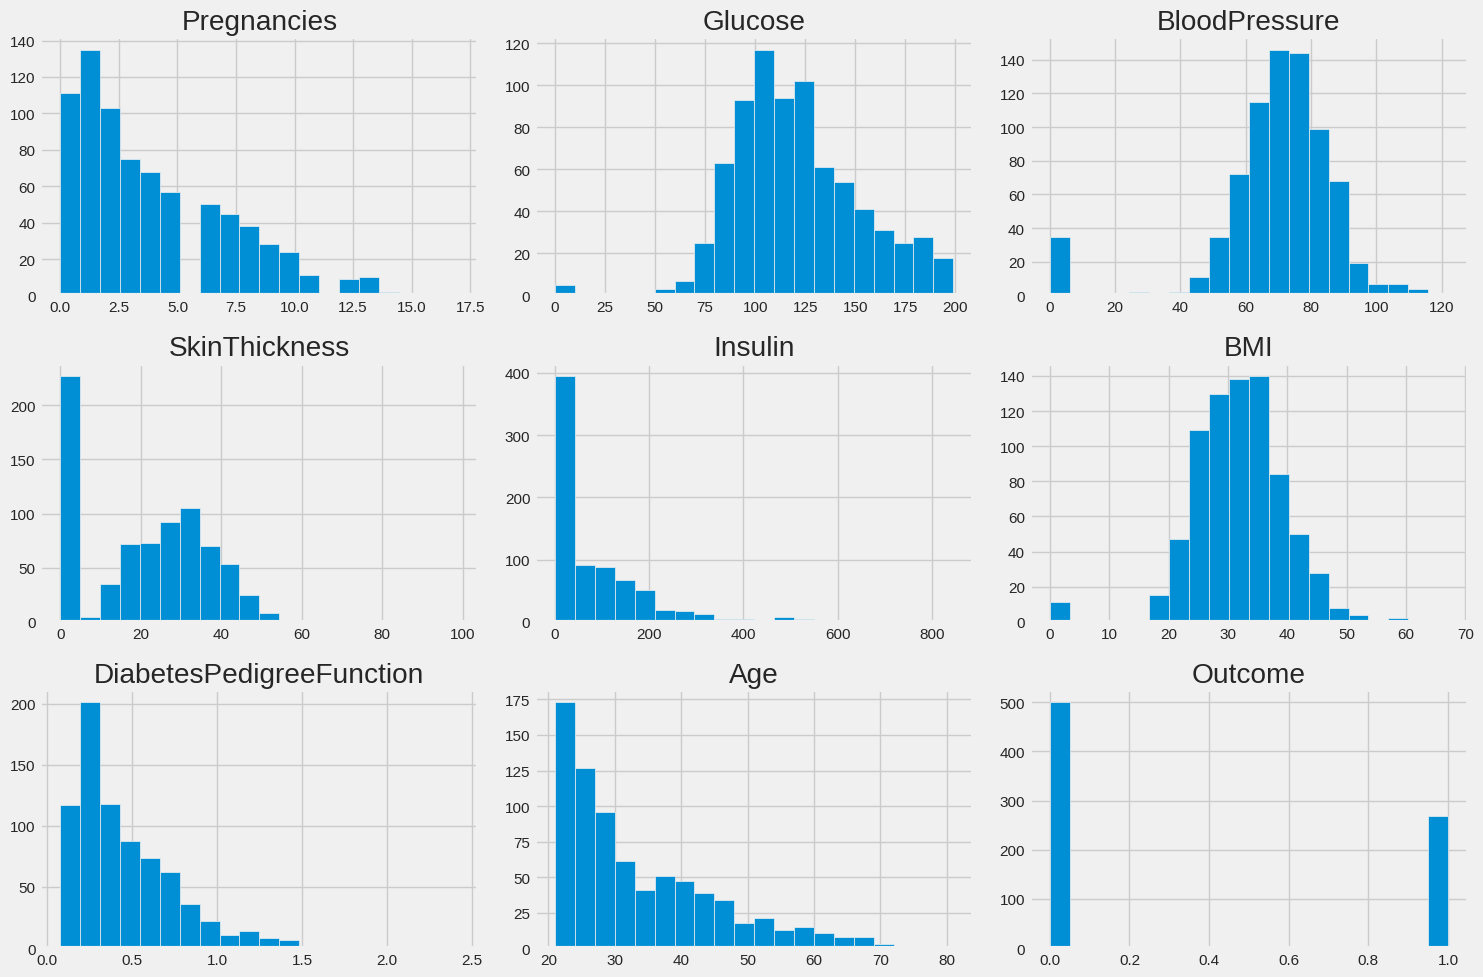

In [129]:
# Create histograms for the numeric features in a 3x3 grid
df.hist(figsize=(15, 10), bins=20, layout=(3, 3))
plt.tight_layout()
plt.show()

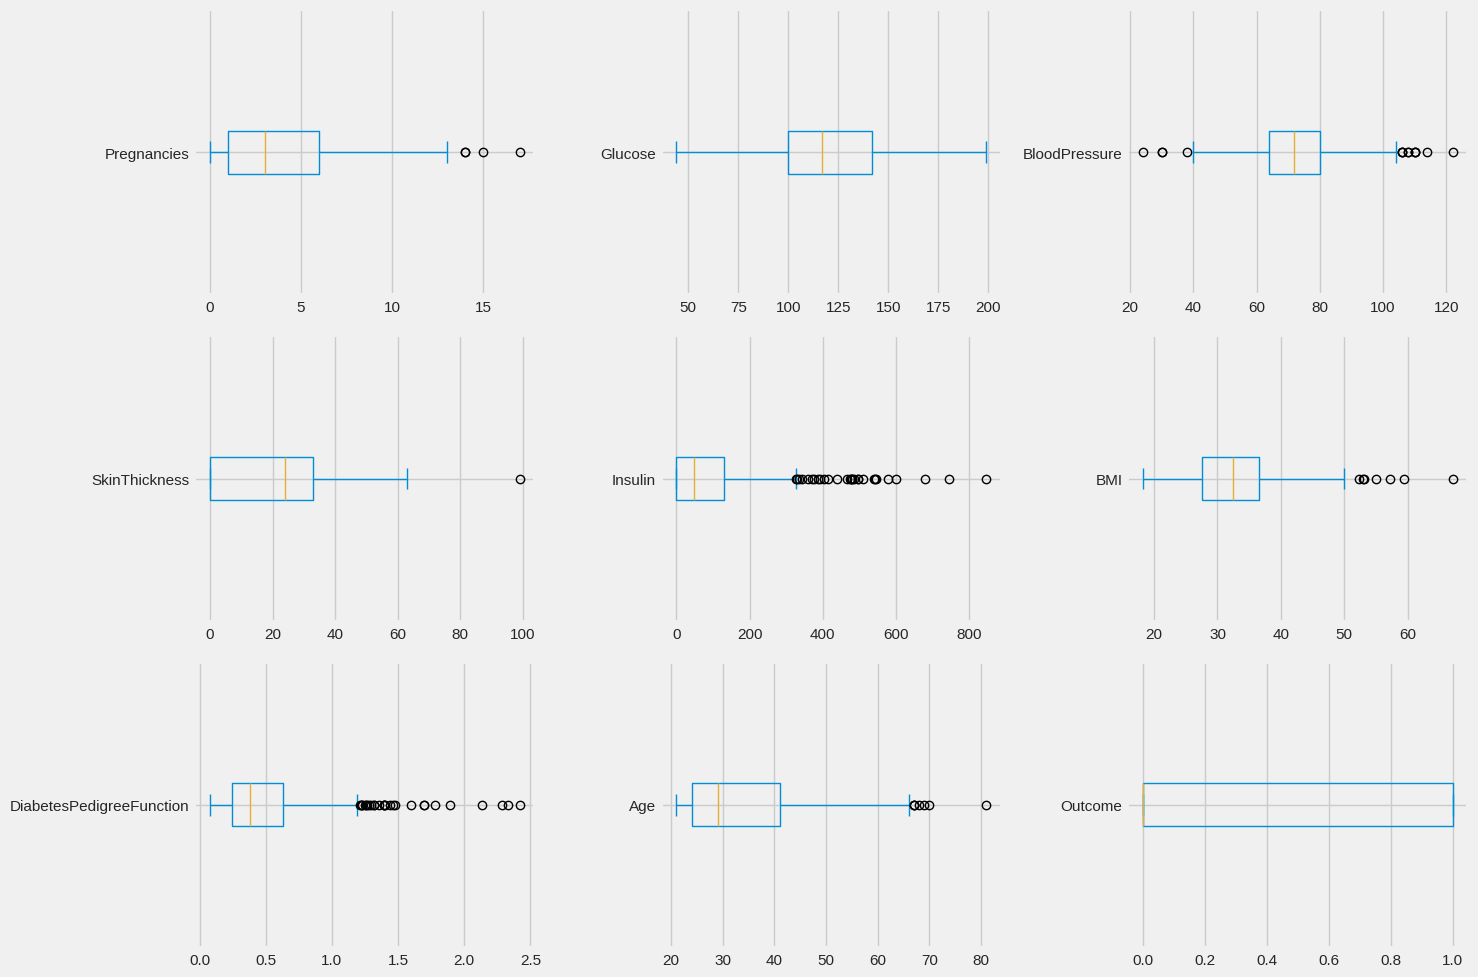

In [140]:
# Create horizontal boxplots for the numeric features in a 3x3 grid
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(15, 10), vert=False)
plt.tight_layout()
plt.show()

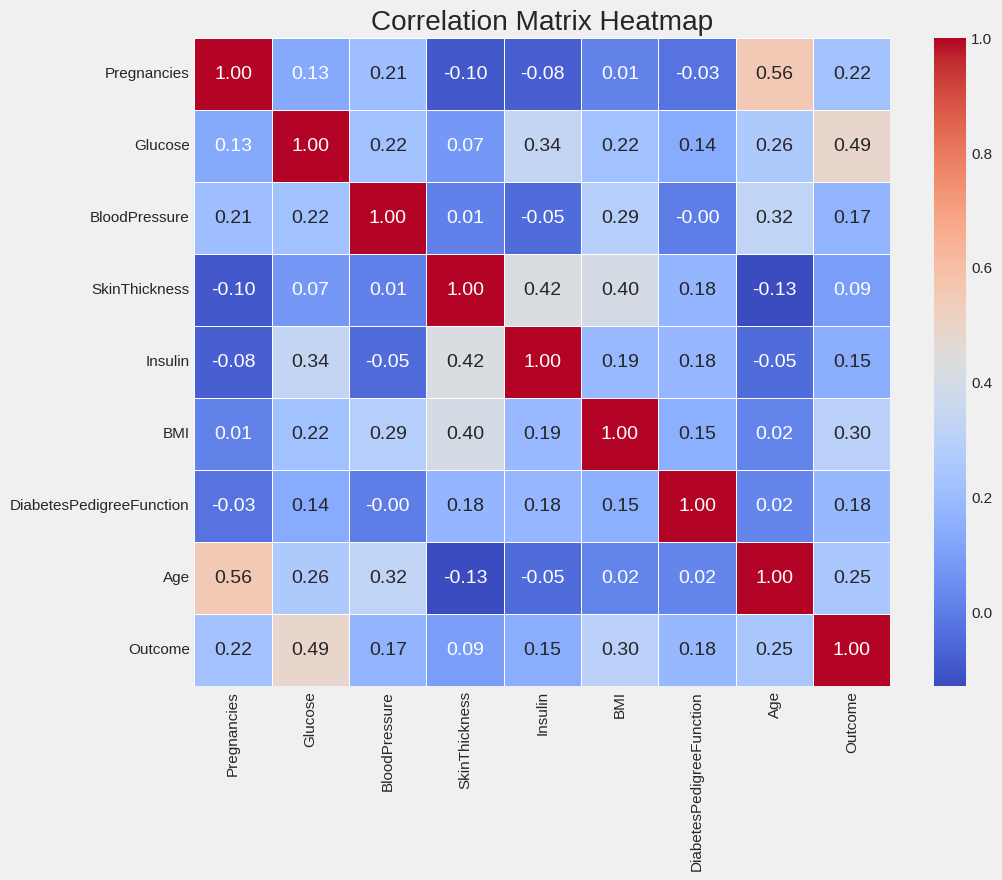

In [141]:
# Create a heatmaop
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

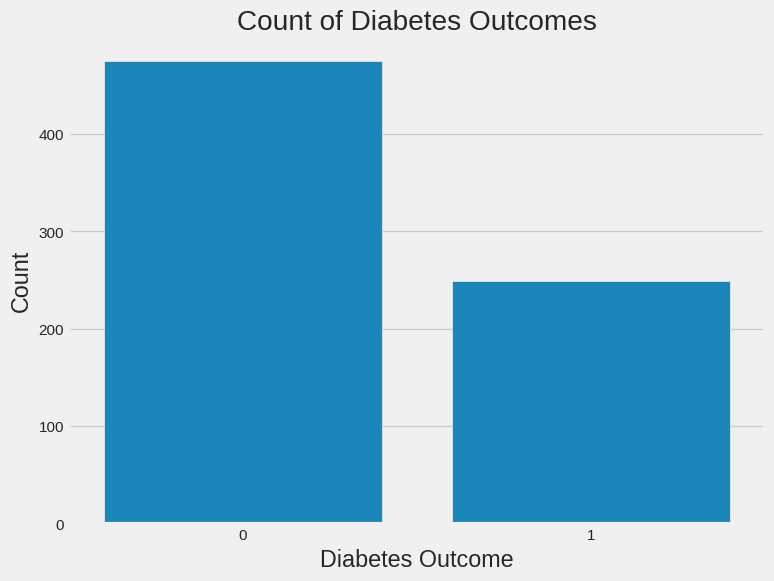

In [142]:
# Create a bar plot for diabetes outcome counts with different colors for each outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Count of Diabetes Outcomes')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.show()

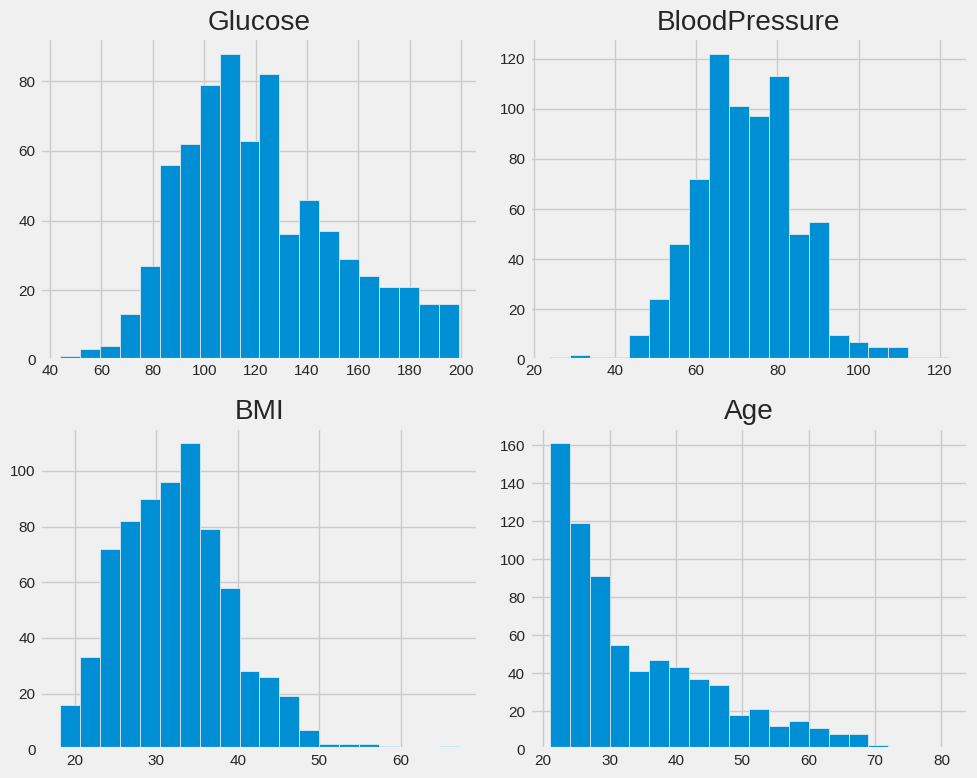

In [143]:
# Create histograms for Glucose, BloodPressure, BMI, and Age
df[['Glucose', 'BloodPressure', 'BMI', 'Age']].hist(figsize=(10, 8), bins=20, layout=(2, 2))
plt.tight_layout()
plt.show()

# Machine Learning 

In [144]:
# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [145]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.635022  0.849933      -0.032378       0.862278 -0.722572  0.164562   
1    -0.852861 -1.200262      -0.517370       0.480644 -0.722572 -0.852262   
2     1.230175  1.988930      -0.679035      -1.363918 -0.722572 -1.331622   
3    -0.852861 -1.070091      -0.517370       0.099010  0.081288 -0.634371   
4    -1.150438  0.491962      -2.619006       0.862278  0.714115  1.544537   

   DiabetesPedigreeFunction       Age  
0                  0.458421  1.416075  
1                 -0.372691 -0.199947  
2                  0.593928 -0.114893  
3                 -0.926765 -1.050485  
4                  5.460146 -0.029839  


In [146]:
dont_panic = 42

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=dont_panic, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (579, 8)
Test set size: (145, 8)


In [147]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=dont_panic)

# Train the model
model.fit(X_train, y_train)

# Predict the target values
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        95
           1       0.57      0.52      0.54        50

    accuracy                           0.70       145
   macro avg       0.66      0.65      0.66       145
weighted avg       0.69      0.70      0.69       145

Training Accuracy: 0.8048359240069085


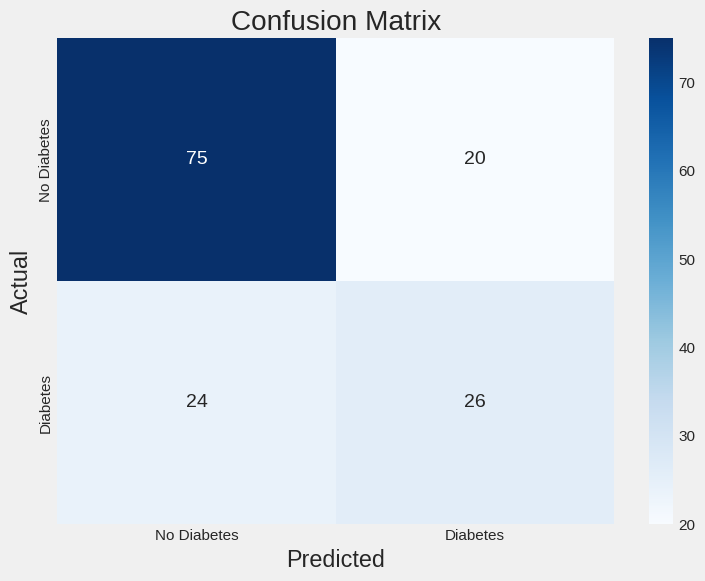

In [148]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()